<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hypotheses" data-toc-modified-id="Hypotheses-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hypotheses</a></span></li><li><span><a href="#P-Values" data-toc-modified-id="P-Values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>P-Values</a></span></li><li><span><a href="#T-Tests" data-toc-modified-id="T-Tests-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>T-Tests</a></span><ul class="toc-item"><li><span><a href="#Men-vs.-Women" data-toc-modified-id="Men-vs.-Women-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Men vs. Women</a></span></li><li><span><a href="#Two-Random-Groups" data-toc-modified-id="Two-Random-Groups-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Two Random Groups</a></span></li></ul></li><li><span><a href="#Power-Analysis" data-toc-modified-id="Power-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Power Analysis</a></span></li><li><span><a href="#Dig-More" data-toc-modified-id="Dig-More-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dig More</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
import warnings
warnings.filterwarnings('ignore', message="The 'normed' kwarg is deprecated")

In [3]:
np.random.seed(20180720)

# Identify Boring or Interesting – Hypothesis Testings

## Hypotheses

* Null hypothesis, $ H_0 $: the boring part, e.g., the medicine has no effect.
* Alternative hypothesis, $ H_1 $: the interesting part, e.g., the medicine saves lives!

## P-Values

<img style="float: left; width: 50%;" alt="P-value_in_statistical_significance_testing.svg" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/P-value_in_statistical_significance_testing.svg">
<div style="clear: both"></div>

p-value  
= Given the distribution, the probability of more extreme values than the observed value.  
= P(more extreme values | the distribution)  
= P(the tail | the distribution)  
= $ P(X \geq x \mid H) $ if right tail event  
= $ P(X \leq x \mid H) $ if left tail event  
= $ 2\min\{P(X\leq x \mid H),P(X\geq x \mid H)\} $ if double tail event

## T-Tests

$ H_0 $: the means of two populations are equal.

In [4]:
df = pd.read_csv('dataset_howell1.csv', sep=';')
display(df.head(), df.tail(), df.shape)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


,height,weight,age,male
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062496,21.0,0
542,71.120,8.051258,0.0,1
543,158.750,52.531624,68.0,1


(544, 4)

### Men vs. Women

* $ H_0 $: men and women have the same mean of heights.

In [5]:
df['height'].groupby(df.male).describe()

,count,mean,std,min,25%,50%,75%,max
male,,,,,,,,
0,287.0,134.630278,25.930233,53.975,125.2474,146.05,151.130,162.56
1,257.0,142.321037,28.871320,60.452,124.9934,157.48,161.925,179.07


In [6]:
df_men_height = df[df.male == 0].height
df_women_height = df[df.male == 1].height

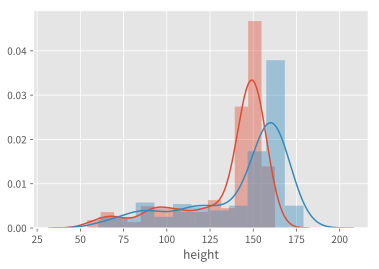

In [7]:
sns.distplot(df_men_height)
sns.distplot(df_women_height)

In [8]:
r = sp.stats.ttest_ind(df_men_height, df_women_height)
r

Ttest_indResult(statistic=-3.273256851064318, pvalue=0.0011309256622558707)

In [9]:
r.pvalue < 0.05

True

### Two Random Groups

* $ H_0 $: The random groups have the same mean of heights.

In [10]:
randint_2_a = np.random.randint(2, size=len(df))

In [11]:
df['height'].groupby(randint_2_a).describe()

,count,mean,std,min,25%,50%,75%,max
0,266.0,138.353431,27.360924,55.880,125.1712,148.1201,157.48,172.9994
1,278.0,138.177640,27.880644,53.975,124.7775,148.5900,157.48,179.0700


In [12]:
df_0_height = df[randint_2_a == 0].height
df_1_height = df[randint_2_a == 1].height

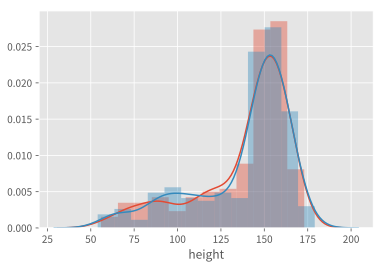

In [13]:
sns.distplot(df_0_height)
sns.distplot(df_1_height)

In [14]:
r = sp.stats.ttest_ind(df_0_height, df_1_height)
r

Ttest_indResult(statistic=0.07418487698707867, pvalue=0.9408906496796933)

In [15]:
r.pvalue < 0.05

False

## Power Analysis

In [16]:
alpha = 0.05  # pre-defined false positive rate

observed_power = sm.stats.tt_ind_solve_power(
    alpha=alpha,
    effect_size=(df_men_height.mean()-df_women_height.mean())/df.height.std(ddof=1),
    nobs1=len(df_men_height),
    ratio=len(df_women_height)/len(df_men_height),
    power=None,
)

print(observed_power)  # === true positive rate

observed_beta = 1-observed_power
print(observed_beta)  # === false negative rate

0.8994893635100675
0.10051063648993253


## Dig More

* [P-value – Wikipedia](https://en.wikipedia.org/wiki/P-value)
* [Student's t-test – Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)
* [Student's t-distribution – Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
* [Choosing Between a Nonparametric Test and a Parametric Test – Minitab](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test) *[recommended]*
* [ttest_ind – SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [tt_ind_solve_power – StatsModels](http://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_ind_solve_power.html)